In [144]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [145]:
df=pd.read_csv("WDM.csv")
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [146]:
# Step 1: Handling missing values
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [147]:
# Step 2: Convert percentage and currency columns
percentage_columns = ["Business Tax Rate", "Tourism Inbound", "Tourism Outbound"]
df[percentage_columns] = df[percentage_columns].replace('[\$,%]', '', regex=True).astype(float)

In [148]:
# Step 3: Handle GDP column - Remove commas, fill missing values with median
df['GDP'] = df['GDP'].replace('[\$,]', '', regex=True).astype(float)
median_gdp = df['GDP'].median()
df['GDP'].fillna(median_gdp, inplace=True)

In [149]:
# Step 4: Handle 'Health Exp/Capita' column - Remove '$', fill missing values with median
df['Health Exp/Capita'] = df['Health Exp/Capita'].replace('[\$,]', '', regex=True).astype(float)
median_health_exp_capita = df['Health Exp/Capita'].mean()
df['Health Exp/Capita'].fillna(median_health_exp_capita, inplace=True)

In [150]:
# Forward fill null values
df.fillna(method='ffill', inplace=True)

# Backward fill null values
df.fillna(method='bfill', inplace=True)

In [151]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,76.9,87931.0,Algeria,26.0,94.0,26998.0,5.479006e+10,0.035,60.000000,...,67.0,0.0,1,0.3420,0.6190,0.039,31719449,0.599,1.020000e+08,1.930000e+08
1,0.050,76.9,9542.0,Angola,26.0,94.0,7499.0,9.129595e+09,0.034,22.000000,...,44.0,0.0,1,0.4760,0.4990,0.025,13924930,0.324,3.400000e+07,1.460000e+08
2,0.043,76.9,1617.0,Benin,26.0,94.0,1983.0,2.359122e+09,0.043,15.000000,...,53.0,0.0,1,0.4540,0.5170,0.029,6949366,0.383,7.700000e+07,5.000000e+07
3,0.027,76.9,4276.0,Botswana,26.0,94.0,1836.0,5.788312e+09,0.047,152.000000,...,49.0,0.1,1,0.3830,0.5870,0.029,1755375,0.532,2.270000e+08,2.090000e+08
4,0.046,76.9,1041.0,Burkina Faso,26.0,94.0,14338.0,2.610959e+09,0.051,12.000000,...,49.0,0.0,1,0.4680,0.5050,0.028,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,29.1,8529.0,Turks and Caicos Islands,26.0,94.0,14338.0,1.507975e+10,0.061,801.397077,...,69.0,0.5,1,0.2995,0.6425,0.052,32427,0.911,7.900000e+07,5.800000e+07
2700,0.013,46.4,8529.0,United States,5.0,4.0,2132446.0,1.624460e+13,0.179,8895.000000,...,76.0,1.0,1,0.1960,0.6670,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,41.9,8529.0,Uruguay,7.0,85.0,14338.0,5.000435e+10,0.089,1308.000000,...,74.0,1.5,1,0.2200,0.6390,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,61.9,8529.0,"Venezuela, RB",144.0,180.0,14338.0,3.812862e+11,0.046,593.000000,...,72.0,1.0,1,0.2880,0.6520,0.060,29954782,0.889,9.040000e+08,3.202000e+09


In [152]:
import pandas as pd

# Group the DataFrame by 'Country' and calculate the average for each column
avg_by_country = df.groupby('Country').mean().reset_index()

print(avg_by_country)
df_1=avg_by_country

                   Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0              Afghanistan    0.043154          51.915385    3322.384615   
1                  Albania    0.014692          55.761538    4613.923077   
2                  Algeria    0.022077          74.938462   88328.615385   
3           American Samoa    0.020077          68.023077    8529.000000   
4                  Andorra    0.011308          55.761538    1767.076923   
..                     ...         ...                ...            ...   
203                Vietnam    0.016769          53.169231   84881.923077   
204  Virgin Islands (U.S.)    0.013000          63.900000    8529.000000   
205            Yemen, Rep.    0.034923          68.023077   17659.076923   
206                 Zambia    0.043923          38.776923    3043.692308   
207               Zimbabwe    0.032000          55.000000   10279.769231   

     Days to Start Business  Ease of Business  Energy Usage           GDP  \
0         

In [153]:
df_1

,Country,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,Afghanistan,0.043154,51.915385,3322.384615,13.615385,99.846154,14338.000000,1.013132e+10,0.087154,149.214935,...,56.384615,0.292308,1.0,0.490308,0.488769,0.020769,2.539926e+07,0.232923,1.437692e+08,9.300000e+07
1,Albania,0.014692,55.761538,4613.923077,23.692308,93.076923,2971.769231,8.895522e+09,0.061462,168.846154,...,73.000000,0.561538,1.0,0.258385,0.653692,0.087923,2.956845e+06,0.478538,1.165231e+09,1.007077e+09
2,Algeria,0.022077,74.938462,88328.615385,25.230769,98.384615,32526.461538,1.190391e+11,0.038462,133.846154,...,68.384615,0.492308,1.0,0.292692,0.663077,0.044231,3.476067e+07,0.645154,2.752308e+08,4.513077e+08
3,American Samoa,0.020077,68.023077,8529.000000,26.000000,94.000000,14338.000000,1.507975e+10,0.061000,801.397077,...,69.000000,0.307692,1.0,0.299500,0.642500,0.052000,5.752538e+04,0.880000,4.613077e+08,1.571538e+09
4,Andorra,0.011308,55.761538,1767.076923,26.000000,94.000000,14338.000000,6.210341e+09,0.063231,2394.461538,...,69.000000,0.700000,1.0,0.299500,0.642500,0.052000,7.668408e+04,0.897462,1.165231e+09,1.007077e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Vietnam,0.016769,53.169231,84881.923077,39.230769,94.307692,41038.692308,7.791354e+10,0.060769,51.692308,...,70.076923,0.546154,1.0,0.266154,0.668538,0.065385,8.325515e+07,0.279462,2.782538e+09,2.302077e+09
204,Virgin Islands (U.S.),0.013000,63.900000,8529.000000,26.000000,94.000000,14338.000000,1.507975e+10,0.061000,801.397077,...,75.538462,0.492308,1.0,0.224769,0.661000,0.114308,1.073368e+05,0.938308,1.196846e+09,2.073538e+09
205,"Yemen, Rep.",0.034923,68.023077,17659.076923,37.769231,96.692308,7119.384615,2.065261e+10,0.048308,49.000000,...,60.384615,0.215385,1.0,0.448077,0.524769,0.027231,2.066415e+07,0.295154,4.613077e+08,1.571538e+09
206,Zambia,0.043923,38.776923,3043.692308,26.153846,93.692308,7806.538462,1.025046e+10,0.063846,52.461538,...,48.076923,0.207692,1.0,0.465769,0.507231,0.026846,1.190203e+07,0.370769,1.083846e+08,1.083846e+08


In [154]:
from scipy.stats.mstats import winsorize

numeric_columns = df_1.select_dtypes(include=['float64', 'int64']).columns

# Apply winsorize to each column separately
for column in numeric_columns:
    df_1[column] = winsorize(df_1[column], limits=[0.12, 0.08])

# Display the modified DataFrame
print(df_1)

                   Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0              Afghanistan    0.040846          51.915385    3322.384615   
1                  Albania    0.014692          55.761538    4613.923077   
2                  Algeria    0.022077          74.938462   88328.615385   
3           American Samoa    0.020077          68.023077    8529.000000   
4                  Andorra    0.011308          55.761538    1767.076923   
..                     ...         ...                ...            ...   
203                Vietnam    0.016769          53.169231   84881.923077   
204  Virgin Islands (U.S.)    0.013000          63.900000    8529.000000   
205            Yemen, Rep.    0.034923          68.023077   17659.076923   
206                 Zambia    0.040846          45.769231    3043.692308   
207               Zimbabwe    0.032000          55.000000   10279.769231   

     Days to Start Business  Ease of Business  Energy Usage           GDP  \
0         

In [155]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Birth Rate', 'Energy Usage', 'Business Tax Rate', 'CO2 Emissions', 'GDP', 'Hours to do Tax', 'Internet Usage','Life Expectancy Female','Life Expectancy Male','Mobile Phone Usage','Tourism Inbound', 'Tourism Outbound', 'Health Exp % GDP', 'Health Exp/Capita', 'Population Total']

# Extract the columns to scale
X = df_1[columns_to_scale]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
X_normalized = scaler.fit_transform(X)

In [156]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming 'X' is your feature matrix and 'cluster_labels' are the obtained cluster labels
# Replace 'n_clusters' with the number of clusters chosen in your algorithm
n_clusters = 4

# Fit KMeans clustering

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

df_with_clusters = df_1.copy()
df_with_clusters['Cluster'] = cluster_labels

In [157]:
df_1

,Country,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,Afghanistan,0.040846,51.915385,3322.384615,16.692308,99.846154,14338.000000,1.013132e+10,0.087154,149.214935,...,56.384615,0.292308,1.0,0.448077,0.530538,0.028538,2.539926e+07,0.232923,1.437692e+08,9.300000e+07
1,Albania,0.014692,55.761538,4613.923077,23.692308,93.076923,4175.000000,8.895522e+09,0.061462,168.846154,...,73.000000,0.561538,1.0,0.258385,0.653692,0.087923,2.956845e+06,0.478538,1.165231e+09,1.007077e+09
2,Algeria,0.022077,74.938462,88328.615385,25.230769,98.384615,32526.461538,1.190391e+11,0.038462,133.846154,...,68.384615,0.492308,1.0,0.292692,0.663077,0.044231,3.476067e+07,0.645154,2.752308e+08,4.513077e+08
3,American Samoa,0.020077,68.023077,8529.000000,26.000000,94.000000,14338.000000,1.507975e+10,0.061000,801.397077,...,69.000000,0.307692,1.0,0.299500,0.642500,0.052000,1.087774e+05,0.880000,4.613077e+08,1.571538e+09
4,Andorra,0.011308,55.761538,1767.076923,26.000000,94.000000,14338.000000,6.210341e+09,0.063231,2394.461538,...,69.000000,0.700000,1.0,0.299500,0.642500,0.052000,1.087774e+05,0.897462,1.165231e+09,1.007077e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Vietnam,0.016769,53.169231,84881.923077,39.230769,94.307692,41038.692308,7.791354e+10,0.060769,51.692308,...,70.076923,0.546154,1.0,0.266154,0.668538,0.065385,7.106418e+07,0.279462,2.782538e+09,2.302077e+09
204,Virgin Islands (U.S.),0.013000,63.900000,8529.000000,26.000000,94.000000,14338.000000,1.507975e+10,0.061000,801.397077,...,75.538462,0.492308,1.0,0.224769,0.661000,0.114308,1.087774e+05,0.931385,1.196846e+09,2.073538e+09
205,"Yemen, Rep.",0.034923,68.023077,17659.076923,37.769231,96.692308,7119.384615,2.065261e+10,0.048308,49.000000,...,60.384615,0.215385,1.0,0.448077,0.530538,0.028538,2.066415e+07,0.295154,4.613077e+08,1.571538e+09
206,Zambia,0.040846,45.769231,3043.692308,26.153846,93.692308,7806.538462,1.025046e+10,0.063846,52.461538,...,53.153846,0.207692,1.0,0.448077,0.530538,0.028538,1.190203e+07,0.370769,1.083846e+08,1.083846e+08


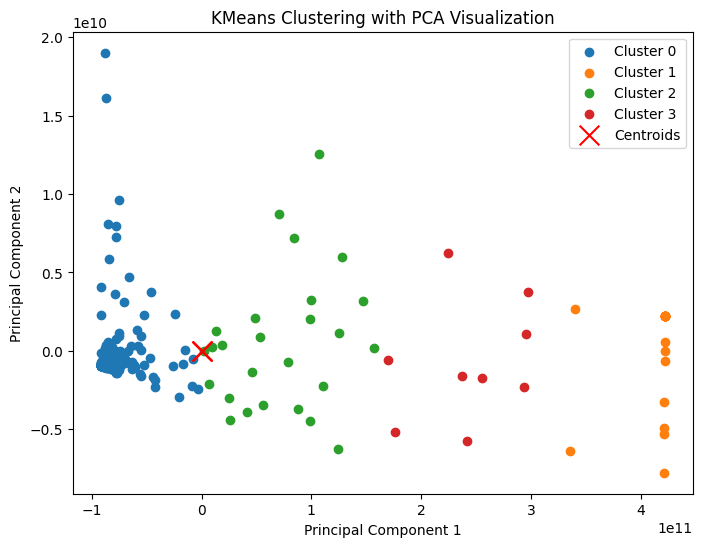

In [158]:
# Visualize clusters using PCA (for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_points = X_pca[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.title('KMeans Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [159]:
df_1

,Country,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,Afghanistan,0.040846,51.915385,3322.384615,16.692308,99.846154,14338.000000,1.013132e+10,0.087154,149.214935,...,56.384615,0.292308,1.0,0.448077,0.530538,0.028538,2.539926e+07,0.232923,1.437692e+08,9.300000e+07
1,Albania,0.014692,55.761538,4613.923077,23.692308,93.076923,4175.000000,8.895522e+09,0.061462,168.846154,...,73.000000,0.561538,1.0,0.258385,0.653692,0.087923,2.956845e+06,0.478538,1.165231e+09,1.007077e+09
2,Algeria,0.022077,74.938462,88328.615385,25.230769,98.384615,32526.461538,1.190391e+11,0.038462,133.846154,...,68.384615,0.492308,1.0,0.292692,0.663077,0.044231,3.476067e+07,0.645154,2.752308e+08,4.513077e+08
3,American Samoa,0.020077,68.023077,8529.000000,26.000000,94.000000,14338.000000,1.507975e+10,0.061000,801.397077,...,69.000000,0.307692,1.0,0.299500,0.642500,0.052000,1.087774e+05,0.880000,4.613077e+08,1.571538e+09
4,Andorra,0.011308,55.761538,1767.076923,26.000000,94.000000,14338.000000,6.210341e+09,0.063231,2394.461538,...,69.000000,0.700000,1.0,0.299500,0.642500,0.052000,1.087774e+05,0.897462,1.165231e+09,1.007077e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Vietnam,0.016769,53.169231,84881.923077,39.230769,94.307692,41038.692308,7.791354e+10,0.060769,51.692308,...,70.076923,0.546154,1.0,0.266154,0.668538,0.065385,7.106418e+07,0.279462,2.782538e+09,2.302077e+09
204,Virgin Islands (U.S.),0.013000,63.900000,8529.000000,26.000000,94.000000,14338.000000,1.507975e+10,0.061000,801.397077,...,75.538462,0.492308,1.0,0.224769,0.661000,0.114308,1.087774e+05,0.931385,1.196846e+09,2.073538e+09
205,"Yemen, Rep.",0.034923,68.023077,17659.076923,37.769231,96.692308,7119.384615,2.065261e+10,0.048308,49.000000,...,60.384615,0.215385,1.0,0.448077,0.530538,0.028538,2.066415e+07,0.295154,4.613077e+08,1.571538e+09
206,Zambia,0.040846,45.769231,3043.692308,26.153846,93.692308,7806.538462,1.025046e+10,0.063846,52.461538,...,53.153846,0.207692,1.0,0.448077,0.530538,0.028538,1.190203e+07,0.370769,1.083846e+08,1.083846e+08


In [160]:
from sklearn.cluster import KMeans

# Assuming 'data' is your dataframe
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)

kmeans.fit(df_1.drop(columns=['Country']))  # Exclude non-numeric columns like 'Country'
print(kmeans)
#kmeans.fit(df_2)
# Assign cluster labels to your original dataframe
df_1['Cluster_Labels'] = kmeans.labels_

KMeans(n_clusters=4, n_init=10, random_state=42)


In [161]:
df_1

,Country,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Cluster_Labels
0,Afghanistan,0.040846,51.915385,3322.384615,16.692308,99.846154,14338.000000,1.013132e+10,0.087154,149.214935,...,0.292308,1.0,0.448077,0.530538,0.028538,2.539926e+07,0.232923,1.437692e+08,9.300000e+07,0
1,Albania,0.014692,55.761538,4613.923077,23.692308,93.076923,4175.000000,8.895522e+09,0.061462,168.846154,...,0.561538,1.0,0.258385,0.653692,0.087923,2.956845e+06,0.478538,1.165231e+09,1.007077e+09,0
2,Algeria,0.022077,74.938462,88328.615385,25.230769,98.384615,32526.461538,1.190391e+11,0.038462,133.846154,...,0.492308,1.0,0.292692,0.663077,0.044231,3.476067e+07,0.645154,2.752308e+08,4.513077e+08,2
3,American Samoa,0.020077,68.023077,8529.000000,26.000000,94.000000,14338.000000,1.507975e+10,0.061000,801.397077,...,0.307692,1.0,0.299500,0.642500,0.052000,1.087774e+05,0.880000,4.613077e+08,1.571538e+09,0
4,Andorra,0.011308,55.761538,1767.076923,26.000000,94.000000,14338.000000,6.210341e+09,0.063231,2394.461538,...,0.700000,1.0,0.299500,0.642500,0.052000,1.087774e+05,0.897462,1.165231e+09,1.007077e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Vietnam,0.016769,53.169231,84881.923077,39.230769,94.307692,41038.692308,7.791354e+10,0.060769,51.692308,...,0.546154,1.0,0.266154,0.668538,0.065385,7.106418e+07,0.279462,2.782538e+09,2.302077e+09,0
204,Virgin Islands (U.S.),0.013000,63.900000,8529.000000,26.000000,94.000000,14338.000000,1.507975e+10,0.061000,801.397077,...,0.492308,1.0,0.224769,0.661000,0.114308,1.087774e+05,0.931385,1.196846e+09,2.073538e+09,0
205,"Yemen, Rep.",0.034923,68.023077,17659.076923,37.769231,96.692308,7119.384615,2.065261e+10,0.048308,49.000000,...,0.215385,1.0,0.448077,0.530538,0.028538,2.066415e+07,0.295154,4.613077e+08,1.571538e+09,0
206,Zambia,0.040846,45.769231,3043.692308,26.153846,93.692308,7806.538462,1.025046e+10,0.063846,52.461538,...,0.207692,1.0,0.448077,0.530538,0.028538,1.190203e+07,0.370769,1.083846e+08,1.083846e+08,0


In [162]:
# Print the columns in your DataFrame
print(df_1.columns)

# Assuming the column representing clusters is named 'Cluster_Labels'
grouped_data = df_1.groupby('Cluster_Labels')

# Accessing and printing details of each cluster
for cluster_name, cluster_data in grouped_data:
    print(f"Cluster_Labels: {cluster_name}")
    print(cluster_data)
    print("\n")

Index(['Country', 'Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound', 'Cluster_Labels'],
      dtype='object')
Cluster_Labels: 0
                   Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0              Afghanistan    0.040846          51.915385    3322.384615   
1                  Albania    0.014692          55.761538    4613.923077   
3           American Samoa    0.020077          68.023077    8529.000000   
4                  Andorra    0.011308          55.761538    1767.076923   
5                   A

In [163]:
import pandas as pd

# read DataFrame
data = df_1

# no of csv files with row size
k = 1
size = len(df_1.index)

for i in range(k):
	df = data[size*i:size*(i+1)]
	df.to_csv(f'Customers_{i+1}.csv', index=False)

df_1 = pd.read_csv("Customers_1.csv")
print(df_1)



                   Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0              Afghanistan    0.040846          51.915385    3322.384615   
1                  Albania    0.014692          55.761538    4613.923077   
2                  Algeria    0.022077          74.938462   88328.615385   
3           American Samoa    0.020077          68.023077    8529.000000   
4                  Andorra    0.011308          55.761538    1767.076923   
..                     ...         ...                ...            ...   
203                Vietnam    0.016769          53.169231   84881.923077   
204  Virgin Islands (U.S.)    0.013000          63.900000    8529.000000   
205            Yemen, Rep.    0.034923          68.023077   17659.076923   
206                 Zambia    0.040846          45.769231    3043.692308   
207               Zimbabwe    0.032000          55.000000   10279.769231   

     Days to Start Business  Ease of Business  Energy Usage           GDP  \
0         

In [164]:
df_1

,Country,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Cluster_Labels
0,Afghanistan,0.040846,51.915385,3322.384615,16.692308,99.846154,14338.000000,1.013132e+10,0.087154,149.214935,...,0.292308,1.0,0.448077,0.530538,0.028538,2.539926e+07,0.232923,1.437692e+08,9.300000e+07,0
1,Albania,0.014692,55.761538,4613.923077,23.692308,93.076923,4175.000000,8.895522e+09,0.061462,168.846154,...,0.561538,1.0,0.258385,0.653692,0.087923,2.956845e+06,0.478538,1.165231e+09,1.007077e+09,0
2,Algeria,0.022077,74.938462,88328.615385,25.230769,98.384615,32526.461538,1.190391e+11,0.038462,133.846154,...,0.492308,1.0,0.292692,0.663077,0.044231,3.476067e+07,0.645154,2.752308e+08,4.513077e+08,2
3,American Samoa,0.020077,68.023077,8529.000000,26.000000,94.000000,14338.000000,1.507975e+10,0.061000,801.397077,...,0.307692,1.0,0.299500,0.642500,0.052000,1.087774e+05,0.880000,4.613077e+08,1.571538e+09,0
4,Andorra,0.011308,55.761538,1767.076923,26.000000,94.000000,14338.000000,6.210341e+09,0.063231,2394.461538,...,0.700000,1.0,0.299500,0.642500,0.052000,1.087774e+05,0.897462,1.165231e+09,1.007077e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Vietnam,0.016769,53.169231,84881.923077,39.230769,94.307692,41038.692308,7.791354e+10,0.060769,51.692308,...,0.546154,1.0,0.266154,0.668538,0.065385,7.106418e+07,0.279462,2.782538e+09,2.302077e+09,0
204,Virgin Islands (U.S.),0.013000,63.900000,8529.000000,26.000000,94.000000,14338.000000,1.507975e+10,0.061000,801.397077,...,0.492308,1.0,0.224769,0.661000,0.114308,1.087774e+05,0.931385,1.196846e+09,2.073538e+09,0
205,"Yemen, Rep.",0.034923,68.023077,17659.076923,37.769231,96.692308,7119.384615,2.065261e+10,0.048308,49.000000,...,0.215385,1.0,0.448077,0.530538,0.028538,2.066415e+07,0.295154,4.613077e+08,1.571538e+09,0
206,Zambia,0.040846,45.769231,3043.692308,26.153846,93.692308,7806.538462,1.025046e+10,0.063846,52.461538,...,0.207692,1.0,0.448077,0.530538,0.028538,1.190203e+07,0.370769,1.083846e+08,1.083846e+08,0


In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming your DataFrame is named 'df'
# Assuming the column representing clusters is named 'Cluster_Labels'
# Assuming all other columns are your independent variables

# Extracting independent variables
X = df_1.drop(['Country', 'Cluster_Labels'], axis=1)

# Extracting dependent variable
y = df_1['Cluster_Labels']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the classifier (Random Forest in this example)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Printing the results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', report)


Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.57      1.00      0.73         4
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         3

    accuracy                           0.93        42
   macro avg       0.64      0.75      0.68        42
weighted avg       0.89      0.93      0.90        42



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [166]:
!pip install -q streamlit

In [172]:
%%writefile app.py
import pandas as pd
import streamlit as st
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px

# Define the interpret_cluster function
def interpret_cluster(cluster_label):
    if cluster_label == 0:
        return ("Moderate to high GDP values.\n"
                "Low Birth Rate.\n"
                "Business Tax Rate is relatively high.\n"
                "Moderate to low CO2 Emissions.\n"
                "Represents a mix of countries with diverse economic statuses.\n"
                "May include both developing and developed nations.")
    elif cluster_label == 1:
        return ("Moderate Birth Rate.\n"
                "High Business Tax Rate.\n"
                "High CO2 Emissions.\n"
                "Includes populous countries like China, India, etc.\n"
                "High GDP values.\n"
                "Dominated by populous countries like China, India, etc.\n"
                "Economic powerhouses with significant contributions to the global economy.")
    elif cluster_label == 2:
        return ("Low Birth Rate.\n"
                "High Business Tax Rate.\n"
                "Variable CO2 Emissions.\n"
                "Mix of countries with developed economies, including Belgium, Netherlands, etc.\n"
                "High GDP values.\n"
                "Represents countries with developed economies.\n"
                "Includes nations like Belgium, Netherlands, etc., known for their strong economic positions.")
    elif cluster_label == 3:
        return ("Moderate to high Birth Rate.\n"
                "High Business Tax Rate.\n"
                "Variable CO2 Emissions.\n"
                "Includes a diverse set of countries such as Egypt, South Africa, Hong Kong, etc.\n"
                "Variable GDP values.\n"
                "Encompasses countries with diverse economic statuses.\n"
                "Some countries might have moderate GDP, while others could have higher or lower values.")

# Set the title of the Streamlit app
st.title("K Means Clustering Model App")

# Load data
df = pd.read_csv("Customers_1.csv")

# Select relevant columns for clustering
# Select relevant columns for clustering
selected_columns = ['Country', 'Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Days to Start Business',
                    'Ease of Business', 'Energy Usage', 'GDP', 'Health Exp % GDP',
                    'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage',
                    'Population Total', 'Population Urban', 'Tourism Inbound',
                    'Tourism Outbound']


# Extract the selected columns from the DataFrame
X = df[selected_columns]

# Allow the user to input values for prediction
input_values = {}
for column in selected_columns[1:]:
    input_values[column] = st.sidebar.number_input(f'Enter value for {column}')

# Add 'Country' to the input section
input_values['Country'] = st.sidebar.text_input('Enter Country')

# Create a DataFrame with the input values
input_df = pd.DataFrame([input_values])

# Fit KMeans model on the entire dataset
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X.drop(columns=['Country']))

# Predict the cluster for the input values
predicted_cluster = kmeans.predict(input_df.drop(columns=['Country']))

# Display the predicted cluster label
st.write(f'The input values belong to Cluster {predicted_cluster[0]}')
st.write(interpret_cluster(predicted_cluster[0]))

# Apply PCA transformation to the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(columns=['Country']))

# Transform the input values using the same PCA model
input_pca = pca.transform(input_df.drop(columns=['Country']))

# Add the PCA components to the DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Display the scatter plot with clusters using PCA components
fig = px.scatter(df, x='PCA1', y='PCA2', color='Cluster_Labels',
                 size='Population Total', hover_data=['Country'],
                 color_continuous_scale='viridis')
st.write(fig)

# Display the entered values in a table
st.write("Entered Values:")
st.write(input_df)


Overwriting app.py


In [173]:
#!npm install localtunnel
!wget -q -O - icanhazip.com

34.106.138.72


In [174]:
!streamlit run app.py &>/content/logs.txt &

In [175]:
!npx localtunnel --port 8501

npx: installed 22 in 6.686s
your url is: https://rude-keys-rest.loca.lt
^C
